1.Load all needed data

In [ ]:
!pip install pyshp

In [ ]:
!pip install "dask[complete]"

In [ ]:
! pip install geopandas

In [ ]:
! pip install contextily

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import shapefile
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import dask.dataframe as dd

In [ ]:
import geopandas as gpd

import matplotlib.pyplot as plt

import contextily as cx
from contextily.tile import warp_img_transform, warp_tiles, _warper

In [ ]:
!curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-07.csv> yellow_tripdata_2019-07.csv
!curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-08.csv> yellow_tripdata_2019-08.csv
!curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-09.csv> yellow_tripdata_2019-09.csv
!curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-10.csv> yellow_tripdata_2019-10.csv
!curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-11.csv> yellow_tripdata_2019-11.csv
!curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-12.csv> yellow_tripdata_2019-12.csv

!curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-07.csv> yellow_tripdata_2020-07.csv
!curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-08.csv> yellow_tripdata_2020-08.csv
!curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-09.csv> yellow_tripdata_2020-09.csv
!curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-10.csv> yellow_tripdata_2020-10.csv
!curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-11.csv> yellow_tripdata_2020-11.csv
!curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-12.csv> yellow_tripdata_2020-12.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  557M  100  557M    0     0  72.5M      0  0:00:07  0:00:07 --:--:-- 81.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  536M  100  536M    0     0  80.4M      0  0:00:06  0:00:06 --:--:-- 87.1M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  580M  100  580M    0     0  60.1M      0  0:00:09  0:00:09 --:--:-- 57.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  638M  100  638M    0     0  35.1M      0  0:00:18  0:00:18 --:--:-- 39.8M
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
#get permission from Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#taxi data 2019
#for i in ['07','08','09','10','11','12']:
  #trips2019 = pd.read_csv('yellow_tripdata_2019-{}.csv'.format(i))
#trips2019

df2019 = dd.read_csv('yellow_tripdata_2019-*.csv', dtype={'trip_distance': float,
                        'total_amount': float, 'tolls_amount':float, 'RatecodeID': float, 'VendorID': float,
                                                     'passenger_count': float, 'payment_type':float,
                                                     'PULocationID':int, 'DOLocationID':int})
df2019.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2019-07-01 00:51:04,2019-07-01 00:51:33,1.0,0.00,1.0,N,193,193,1.0,2.5,0.5,0.5,1.14,0.00,0.3,4.94,0.0
1,2.0,2019-07-01 00:46:04,2019-07-01 01:05:46,1.0,4.16,1.0,N,234,25,2.0,16.5,0.5,0.5,0.00,0.00,0.3,20.30,2.5
2,1.0,2019-07-01 00:25:09,2019-07-01 01:00:56,1.0,18.80,2.0,N,132,42,1.0,52.0,0.0,0.5,11.75,6.12,0.3,70.67,0.0
3,2.0,2019-07-01 00:33:32,2019-07-01 01:15:27,1.0,18.46,2.0,N,132,142,1.0,52.0,0.0,0.5,11.06,0.00,0.3,66.36,2.5
4,1.0,2019-07-01 00:00:55,2019-07-01 00:13:05,0.0,1.70,1.0,N,107,114,1.0,9.5,3.0,0.5,2.00,0.00,0.3,15.30,2.5


In [ ]:
#taxi data 2020
df2020 = dd.read_csv('yellow_tripdata_2020-*.csv', dtype={'trip_distance': float,
                        'total_amount': float, 'tolls_amount':float, 'RatecodeID': float, 'VendorID': float,
                                                     'passenger_count': float, 'payment_type':float,
                                                     'PULocationID':int, 'DOLocationID':int})
df2020.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-07-01 00:25:32,2020-07-01 00:33:39,1.0,1.50,1.0,N,238,75,2.0,8.0,0.5,0.5,0.00,0.0,0.3,9.30,0.0
1,1.0,2020-07-01 00:03:19,2020-07-01 00:25:43,1.0,9.50,1.0,N,138,216,1.0,26.5,0.5,0.5,0.00,0.0,0.3,27.80,0.0
2,2.0,2020-07-01 00:15:11,2020-07-01 00:29:24,1.0,5.85,1.0,N,230,88,2.0,18.5,0.5,0.5,0.00,0.0,0.3,22.30,2.5
3,2.0,2020-07-01 00:30:49,2020-07-01 00:38:26,1.0,1.90,1.0,N,88,232,1.0,8.0,0.5,0.5,2.36,0.0,0.3,14.16,2.5
4,2.0,2020-07-01 00:31:26,2020-07-01 00:38:02,1.0,1.25,1.0,N,37,17,2.0,6.5,0.5,0.5,0.00,0.0,0.3,7.80,0.0


In [ ]:
# select few columns that we need for further
df2019 = df2019[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'trip_distance', 'PULocationID', 'DOLocationID']]
df2019.head()
df2020 = df2020[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'trip_distance', 'PULocationID', 'DOLocationID']]
df2019.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID
0,2.0,2019-07-01 00:51:04,2019-07-01 00:51:33,0.00,193,193
1,2.0,2019-07-01 00:46:04,2019-07-01 01:05:46,4.16,234,25
2,1.0,2019-07-01 00:25:09,2019-07-01 01:00:56,18.80,132,42
3,2.0,2019-07-01 00:33:32,2019-07-01 01:15:27,18.46,132,142
4,1.0,2019-07-01 00:00:55,2019-07-01 00:13:05,1.70,107,114


In [ ]:
#merge 2019 and 2020 data (dask)
df = dd.concat([df2019, df2020])
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID
0,2.0,2019-07-01 00:51:04,2019-07-01 00:51:33,0.00,193,193
1,2.0,2019-07-01 00:46:04,2019-07-01 01:05:46,4.16,234,25
2,1.0,2019-07-01 00:25:09,2019-07-01 01:00:56,18.80,132,42
3,2.0,2019-07-01 00:33:32,2019-07-01 01:15:27,18.46,132,142
4,1.0,2019-07-01 00:00:55,2019-07-01 00:13:05,1.70,107,114


In [ ]:
#convert dask to dataframe

dftrip = df.compute()
dftrip.head()

/usr/local/lib/python3.7/dist-packages/dask/utils.py:30: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*args, **kwargs)


KeyboardInterrupt: ignored

In [ ]:
#prepare data for network analysis
trips_PUDO = dftrip[['PULocationID', 'DOLocationID']]
trips_PUDO.head()

,PULocationID,DOLocationID
0,193,193
1,234,25
2,132,42
3,132,142
4,107,114


In [ ]:
from google.colab import files
trips_PUDO.to_csv('filename.csv')
files.download('filename.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

clean up data

In [ ]:
dftripclean = trips_PUDO.dropna(how="any", inplace=True)
dftripclean.head()

2.Network Analysis

（1）NYC locationid with LocationID

In [ ]:
def get_lat_lon(sf):
    content = []
    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]

        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2

        content.append((loc_id, x, y))
    return pd.DataFrame(content, columns=["LocationID", "longitude", "latitude"])

In [ ]:

myshp = open("/content/drive/MyDrive/taxi_zones/taxi_zones.shp", "rb")
mydbf = open("/content/drive/MyDrive/taxi_zones/taxi_zones.dbf", "rb")
sf = shapefile.Reader(shp=myshp, dbf=mydbf)


fields_name = [field[0] for field in sf.fields[1:]]
shp_dic = dict(zip(fields_name, list(range(len(fields_name)))))
attributes = sf.records()
shp_attr = [dict(zip(fields_name, attr)) for attr in attributes]

df_loc = pd.DataFrame(shp_attr).join(get_lat_lon(sf).set_index("LocationID"), on="LocationID")


In [ ]:
def get_boundaries(sf):
    lat, lon = [], []
    for shape in list(sf.iterShapes()):
        lat.extend([shape.bbox[0], shape.bbox[2]])
        lon.extend([shape.bbox[1], shape.bbox[3]])

    margin = 0.01 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    return lat_min, lat_max, lon_min, lon_max

In [ ]:
def draw_zone_map(ax, sf, heat={}, text=[], arrows=[]):
    continent = [235/256, 151/256, 78/256]
    ocean = (89/256, 171/256, 227/256)
    theta = np.linspace(0, 2*np.pi, len(text)+1).tolist()
    ax.set_facecolor(ocean)

    # colorbar
    if len(heat) != 0:
        norm = mpl.colors.Normalize(vmin=min(heat.values()),vmax=max(heat.values())) #norm = mpl.colors.LogNorm(vmin=1,vmax=max(heat))
        cm=plt.get_cmap('Reds')
        sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
        sm.set_array([])
        plt.colorbar(sm, ticks=np.linspace(min(heat.values()),max(heat.values()),8),
                     boundaries=np.arange(min(heat.values())-10,max(heat.values())+10,.1))

    for sr in sf.shapeRecords():
        shape = sr.shape
        rec = sr.record
        loc_id = rec[shp_dic['LocationID']]
        zone = rec[shp_dic['zone']]

        if len(heat) == 0:
            col = continent
        else:
            if loc_id not in heat:
                R,G,B,A = cm(norm(0))
            else:
                R,G,B,A = cm(norm(heat[loc_id]))
            col = [R,G,B]

        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0 = shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)

                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=col, alpha=1.0, zorder=2)
                ax.add_patch(patch)

        x = (shape.bbox[0]+shape.bbox[2])/2
        y = (shape.bbox[1]+shape.bbox[3])/2
        if (len(text) == 0 and rec[shp_dic['Shape_Area']] > 0.0001):
            plt.text(x, y, str(loc_id), horizontalalignment='center', verticalalignment='center')
        elif len(text) != 0 and loc_id in text:
            #plt.text(x+0.01, y-0.01, str(loc_id), fontsize=12, color="white", bbox=dict(facecolor='black', alpha=0.5))
            eta_x = 0.05*np.cos(theta[text.index(loc_id)])
            eta_y = 0.05*np.sin(theta[text.index(loc_id)])
            ax.annotate("[{}] {}".format(loc_id, zone), xy=(x, y), xytext=(x+eta_x, y+eta_y),
                        bbox=dict(facecolor='black', alpha=0.5), color="white", fontsize=12,
                        arrowprops=dict(facecolor='black', width=3, shrink=0.05))
    if len(arrows)!=0:
        for arr in arrows:
            ax.annotate('', xy = arr['dest'], xytext = arr['src'], size = arr['cnt'],
                    arrowprops=dict(arrowstyle="fancy", fc="0.6", ec="none"))

    # display
    limits = get_boundaries(sf)
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])

/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


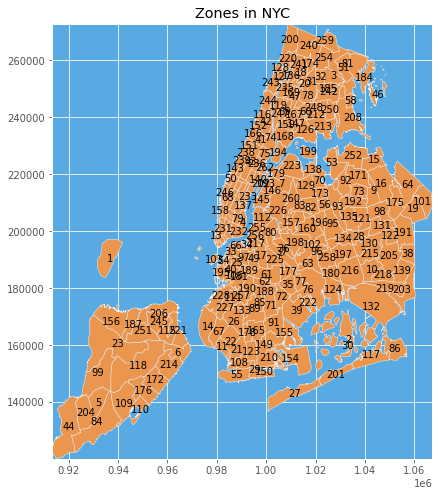

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = plt.subplot(1, 2, 2)
ax.set_title("Zones in NYC")
draw_zone_map(ax, sf)


(2) Trip data network analysis

In [ ]:
#load location data in csv
location = pd.read_csv('/content/drive/MyDrive/taxizone.csv'  )
dict = {'X': 'longtitude',
        'Y': 'latitude'}
location.rename(columns=dict,
          inplace=True)

print(location.shape)
location.head()

(263, 8)


,longtitude,latitude,shape_area,objectid,shape_leng,location_id,zone,borough
0,-74.176779,40.689515,0.000782,1,0.116357,1,Newark Airport,EWR
1,-73.826141,40.625725,0.004866,2,0.433470,2,Jamaica Bay,Queens
2,-73.849480,40.865872,0.000314,3,0.084341,3,Allerton/Pelham Gardens,Bronx
3,-73.977024,40.724151,0.000112,4,0.043567,4,Alphabet City,Manhattan
4,-74.189938,40.550339,0.000498,5,0.092146,5,Arden Heights,Staten Island


In [ ]:
trips_PUDO = pd.read_csv('/content/drive/MyDrive/filename.csv'  )

In [ ]:
#remove the locationid for pu and do >262
trips_PUDO_clean = trips_PUDO[ (trips_PUDO['PULocationID'] <= 262) & (trips_PUDO['DOLocationID'] <= 262)]
trips_PUDO_clean
trips_PUDO_cleandrop = trips_PUDO_clean.dropna()
trips_PUDO_cleandrop

,Unnamed: 0,PULocationID,DOLocationID
0,0,193,193
1,1,234,25
2,2,132,42
3,3,132,142
4,4,107,114
...,...,...,...
46965313,669210,107,242
46965314,669211,236,161
46965315,669212,236,24
46965316,669213,238,239


In [ ]:
TripPos={c:(location['longtitude'][c],location['latitude'][c])
         for c in location.index}
TripPos

{0: (-74.1767785471836, 40.6895151478039),
 1: (-73.826141187548, 40.6257250653606),
 2: (-73.8494797117996, 40.8658720486048),
 3: (-73.9770238531481, 40.7241508237094),
 4: (-74.1899382186973, 40.5503388087419),
 5: (-74.067784415989, 40.5990540522727),
 6: (-73.9214822351202, 40.7610941908165),
 7: (-73.9231996351178, 40.7786091900536),
 8: (-73.788019387688, 40.7543991714348),
 9: (-73.9655685008179, 40.8020326846964),
 10: (-73.7916548635917, 40.678101884465),
 11: (-74.010614577798, 40.6039781434647),
 12: (-74.015489822631, 40.7024875740507),
 13: (-74.016119676412, 40.7116120409703),
 14: (-73.8869234351293, 40.8687686529423),
 15: (-73.9864596713285, 40.6856156764957),
 16: (-74.0304481021718, 40.6235833928849),
 17: (-73.7879935355271, 40.7852453578963),
 18: (-73.9942964016157, 40.6096262221388),
 19: (-74.1593411184408, 40.6074284613631),
 20: (-73.7716756284112, 40.7612343254115),
 21: (-73.949180773692, 40.6919912634499),
 22: (-73.727896170924, 40.7364716742206),
 23: (-

In [ ]:
Taxi=nx.Graph()
Taxi.add_nodes_from(location.index)


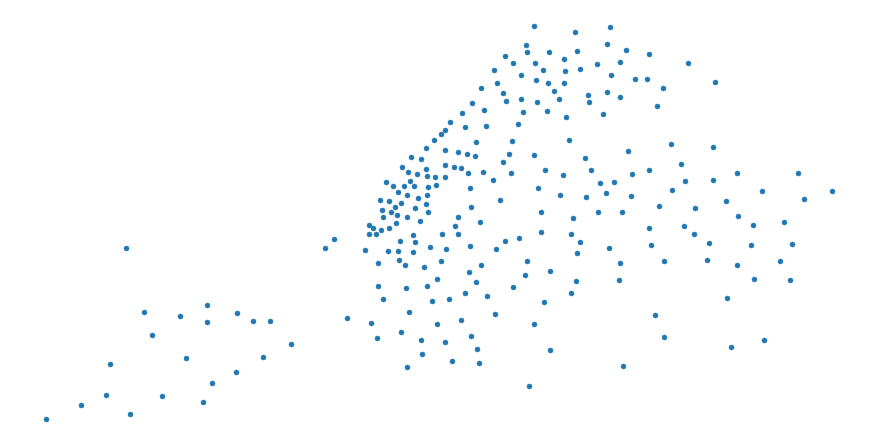

In [ ]:
plt.figure(figsize = (12,6))
nx.draw(Taxi,pos=TripPos,with_labels=False,arrows=False,node_size=25)

In [ ]:
#upload basemap
#basemapgpd = gpd.read_file('/content/drive/MyDrive/Shapefiles and base map.geojson')
#basemapgpd = basemapgpd.to_crs(epsg=3857)
draw_zone_map(ax, sf)


In [ ]:
#add basemap to graph
#zip_p_e=zip_price.to_crs(epsg=3857)
#ax = draw_zone_map.plot(figsize=(15,15),alpha=0.5,legend=True)
nx.add_basemap(draw_zone_map)


AttributeError: ignored

In [ ]:
len(location.index)

263

In [ ]:
#create list of edges as tuples
EN=len(location.index)
edgelist=[(trips_PUDO['PULocationID'][j],trips_PUDO['DOLocationID'][j]) for j in range(EN)]
edgelist


[(193, 193),
 (234, 25),
 (132, 42),
 (132, 142),
 (107, 114),
 (125, 45),
 (142, 68),
 (246, 141),
 (50, 80),
 (80, 97),
 (170, 142),
 (238, 236),
 (75, 74),
 (141, 163),
 (137, 160),
 (229, 233),
 (138, 114),
 (79, 75),
 (107, 83),
 (142, 232),
 (7, 179),
 (223, 260),
 (246, 158),
 (90, 170),
 (233, 90),
 (211, 262),
 (249, 188),
 (249, 65),
 (264, 264),
 (264, 264),
 (144, 48),
 (209, 246),
 (48, 263),
 (136, 240),
 (127, 127),
 (186, 238),
 (48, 230),
 (132, 1),
 (239, 116),
 (132, 139),
 (132, 163),
 (142, 116),
 (142, 142),
 (132, 162),
 (48, 75),
 (164, 142),
 (138, 239),
 (79, 82),
 (132, 13),
 (48, 246),
 (246, 48),
 (48, 79),
 (107, 113),
 (107, 137),
 (211, 17),
 (90, 100),
 (230, 107),
 (263, 238),
 (132, 225),
 (132, 37),
 (138, 33),
 (170, 79),
 (107, 68),
 (68, 87),
 (138, 125),
 (107, 107),
 (170, 79),
 (48, 161),
 (113, 17),
 (48, 50),
 (246, 230),
 (48, 164),
 (164, 230),
 (264, 264),
 (132, 244),
 (138, 230),
 (158, 68),
 (68, 230),
 (230, 50),
 (48, 261),
 (132, 86)

In [ ]:
len(edgelist)

263

In [ ]:
newedgelist = [i for i in edgelist if i[1] < 263]
newedgelist2 = [i for i in newedgelist if i[0] < 263]
#print ("Resultant tuple list: ", str(newedgelist))
newedgelist2

[(193, 193),
 (234, 25),
 (132, 42),
 (132, 142),
 (107, 114),
 (125, 45),
 (142, 68),
 (246, 141),
 (50, 80),
 (80, 97),
 (170, 142),
 (238, 236),
 (75, 74),
 (141, 163),
 (137, 160),
 (229, 233),
 (138, 114),
 (79, 75),
 (107, 83),
 (142, 232),
 (7, 179),
 (223, 260),
 (246, 158),
 (90, 170),
 (233, 90),
 (211, 262),
 (249, 188),
 (249, 65),
 (144, 48),
 (209, 246),
 (136, 240),
 (127, 127),
 (186, 238),
 (48, 230),
 (132, 1),
 (239, 116),
 (132, 139),
 (132, 163),
 (142, 116),
 (142, 142),
 (132, 162),
 (48, 75),
 (164, 142),
 (138, 239),
 (79, 82),
 (132, 13),
 (48, 246),
 (246, 48),
 (48, 79),
 (107, 113),
 (107, 137),
 (211, 17),
 (90, 100),
 (230, 107),
 (132, 225),
 (132, 37),
 (138, 33),
 (170, 79),
 (107, 68),
 (68, 87),
 (138, 125),
 (107, 107),
 (170, 79),
 (48, 161),
 (113, 17),
 (48, 50),
 (246, 230),
 (48, 164),
 (164, 230),
 (132, 244),
 (138, 230),
 (158, 68),
 (68, 230),
 (230, 50),
 (48, 261),
 (132, 86),
 (148, 163),
 (132, 230),
 (170, 239),
 (48, 74),
 (68, 68),
 

In [ ]:
len(newedgelist2)

251

In [ ]:
#add edges to the network
Taxi.add_edges_from(newedgelist2)

In [ ]:
#brew install geos
!pip install https://github.com/matplotlib/basemap/archive/master.zip

  Using cached https://github.com/matplotlib/basemap/archive/master.zip
ERROR: File "setup.py" not found for legacy project https://github.com/matplotlib/basemap/archive/master.zip.


In [ ]:
!pip install basemap

     |████████████████████████████████| 862 kB 5.1 MB/s 
     |████████████████████████████████| 219 kB 55.3 MB/s 
     |████████████████████████████████| 30.5 MB 1.8 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=151dd9c57b960b2d5a883c3177a0ea1542e8e94eeb8f3c2cb80565a3b2b25ea7
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp
  Attempting uninstall: pyshp
    Found existing installation: pyshp 2.2.0
    Uninstalling pyshp-2.2.0:
      Successfully uninstalled pyshp-2.2.0


In [ ]:
from mpl_toolkits.basemap import Basemap
import pycombo

In [ ]:
! pip install pycombo


     |████████████████████████████████| 136 kB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 213 kB 38.2 MB/s 
  Using cached importlib_metadata-1.7.0-py2.py3-none-any.whl (31 kB)
  Created wheel for pycombo: filename=pycombo-0.1.7-cp37-cp37m-manylinux_2_27_x86_64.whl size=98830 sha256=9e19beca46226f3c9742a00b868b377976ed462204d0dc244d4b1c47ed62f386
  Stored in directory: /root/.cache/pip/wheels/58/52/18/4c1b80cd45c091e2c1ea442729343ac984dc66b3a678e2c251
Successfully built pycombo
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


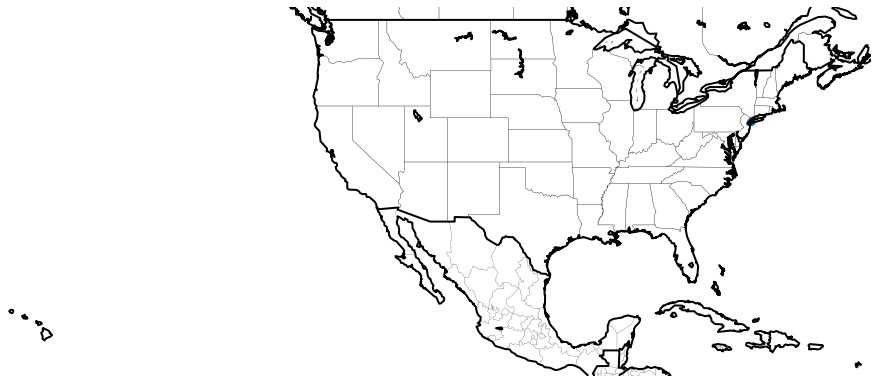

In [ ]:

plt.figure(figsize = (12,8))
m = Basemap(projection='merc',
            llcrnrlon=-160,
            llcrnrlat=15,
            urcrnrlon=-60,
            urcrnrlat=50,
            lat_ts=0, resolution='l',suppress_ticks=True)
#mx, my = m(TripPos['longtitude'].values, TripPos['latitude'].values)
mx, my = m(location['longtitude'], location['latitude'])
pos = {}
for count, elem in enumerate(TripPos):
     pos[elem] = (mx[count], my[count])
#nx.draw_networkx_edges(Taxi, pos=TripPos, edge_color='blue', alpha=0.1, arrows = False)
nx.draw(Taxi,pos=pos,node_size=15,style='dotted',edge_color='green')
m.drawcountries(linewidth = 2)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=2)
plt.tight_layout()
plt.savefig("map.png", dpi = 300)
plt.show()

#TripPos={c:(location['longtitude'][c],location['latitude'][c])
         #for c in location.index}
#TripPos

In [ ]:
my

array([3273783.44328857, 3264433.35476951, 3299679.80316788,
       3278863.947782  , 3253395.05208503, 3260526.6750202 ,
       3284285.86886105, 3286857.47647972, 3283303.06395249,
       3290297.64807316, 3272109.87704392, 3261247.82188112,
       3275685.9830684 , 3277024.40200412, 3300105.71713959,
       3273211.61810384, 3264119.59224049, 3287831.99675598,
       3262075.06414621, 3261753.16219719, 3284306.4411762 ,
       3274146.56251919, 3280671.85866303, 3298489.03965388,
       3260965.27752214, 3264856.52319435, 3254654.14750483,
       3276912.85091683, 3274769.47275871, 3258057.78358609,
       3298805.54301441, 3299470.0076263 , 3261379.42354053,
       3275696.68388547, 3270013.00901914, 3275155.97666681,
       3274773.02035553, 3274340.96044135, 3266360.47981595,
       3272168.77134879, 3290616.6541471 , 3277236.58769363,
       3296974.34059755, 3293090.59205302, 3287422.89685341,
       3250026.58498953, 3296722.29627597, 3284453.59418721,
       3273636.69419529,

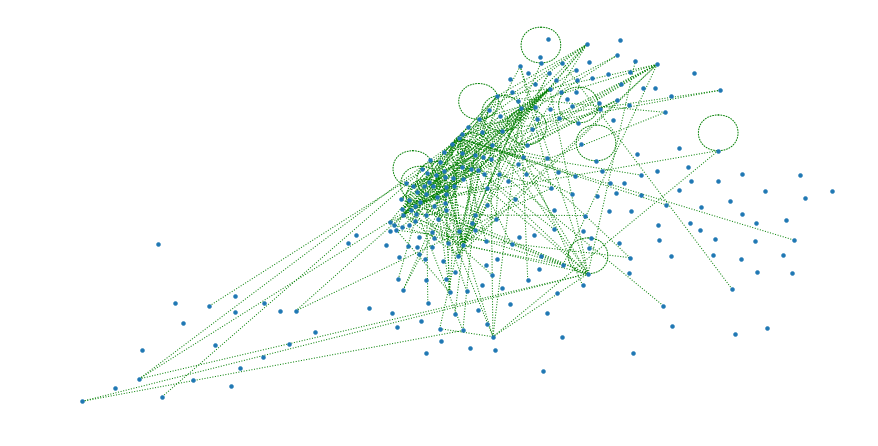

In [ ]:
#visualize the network
plt.figure(figsize = (12,6))
nx.draw(Taxi,pos=TripPos,with_labels=False,node_size=15,style='dotted',edge_color='green')
#draw_zone_map(ax, sf)

In [ ]:
print(nx.info(Taxi))

Graph with 263 nodes and 219 edges


BETWEENESS CENTRALITY( Total of 2019 and 2020)

In [ ]:
betCent = nx.betweenness_centrality(Taxi)
b1 = sorted(betCent, key=betCent.get, reverse=True)[:5]
b1

[132, 48, 107, 79, 138]

In [ ]:
#top 5 betweeness center area
location_df1 = location.copy()
location_df1["Betweeness_centrality"] = location_df1["location_id"].map(betCent)
location_dfr1 = location_df1.sort_values(by=['Betweeness_centrality'], ascending=False)
location_dfr1.head()


,longtitude,latitude,shape_area,objectid,shape_leng,location_id,zone,borough,Betweeness_centrality
136,-73.778341,40.642683,0.002038,132,0.245479,132,JFK Airport,Queens,0.048464
47,-73.989857,40.762237,0.000094,48,0.043747,48,Clinton East,Manhattan,0.023178
107,-73.983310,40.737348,0.000075,107,0.038041,107,Gramercy,Manhattan,0.021291
73,-73.985214,40.727944,0.000108,79,0.042625,79,East Village,Manhattan,0.014627
145,-73.872830,40.774880,0.000537,138,0.107467,138,LaGuardia Airport,Queens,0.013651


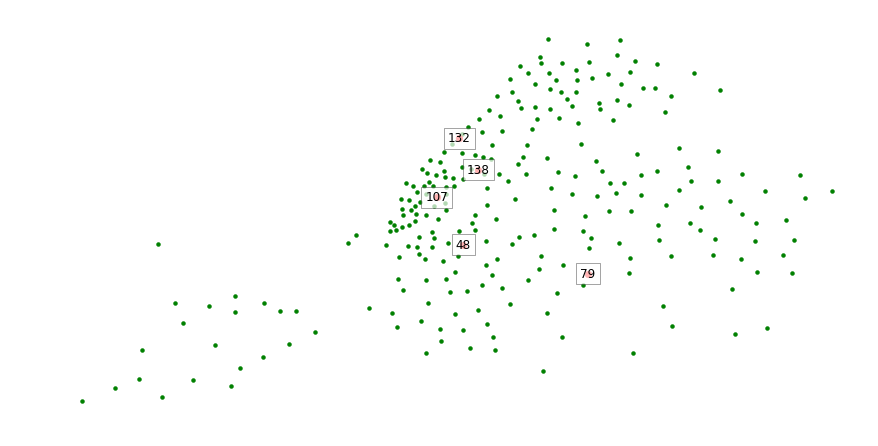

In [ ]:


plt.figure(figsize = (12,6))
nx.draw(Taxi,pos=TripPos,with_labels=False, width=0, node_size=15, node_color='green')
nx.draw(Taxi.subgraph(b1),pos=TripPos,with_labels=False, width=0, node_size=45, node_color='red')
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
_ = nx.draw_networkx_labels(Taxi.subgraph(b1),pos=TripPos,bbox=label_options)



In [ ]:
#heatmap plot

In [ ]:
betCent = nx.betweenness_centrality(Taxi)
b2 = sorted(betCent, key=betCent.get, reverse=True)[-10:]
b2

[251, 252, 253, 254, 255, 257, 258, 259, 261, 262]

In [ ]:
#last 10 betweeness center area
location_df2 = location.copy()
location_df2["Betweeness_centrality"] = location_df2["location_id"].map(betCent)
location_dfr2 = location_df2.sort_values(by=['Betweeness_centrality'], ascending=True)
location_dfr2.head(10)


,longtitude,latitude,shape_area,objectid,shape_leng,location_id,zone,borough,Betweeness_centrality
0,-74.176779,40.689515,0.000782,1,0.116357,1,Newark Airport,EWR,0.0
153,-73.896128,40.593136,0.001790,154,0.227332,154,Marine Park/Floyd Bennett Field,Brooklyn,0.0
154,-73.906776,40.617802,0.000868,155,0.169808,155,Marine Park/Mill Basin,Brooklyn,0.0
155,-74.164929,40.628794,0.001052,156,0.144477,156,Mariners Harbor,Staten Island,0.0
156,-73.913585,40.818259,0.000171,159,0.064363,159,Melrose South,Bronx,0.0
157,-73.901919,40.724040,0.000354,157,0.131300,157,Maspeth,Queens,0.0
159,-73.880731,40.718522,0.000571,160,0.141519,160,Middle Village,Queens,0.0
160,-73.977432,40.758226,0.000072,161,0.035804,161,Midtown Center,Manhattan,0.0
165,-73.954604,40.620962,0.000354,165,0.088608,165,Midwood,Brooklyn,0.0
167,-73.904449,40.827982,0.000168,167,0.090816,167,Morrisania/Melrose,Bronx,0.0


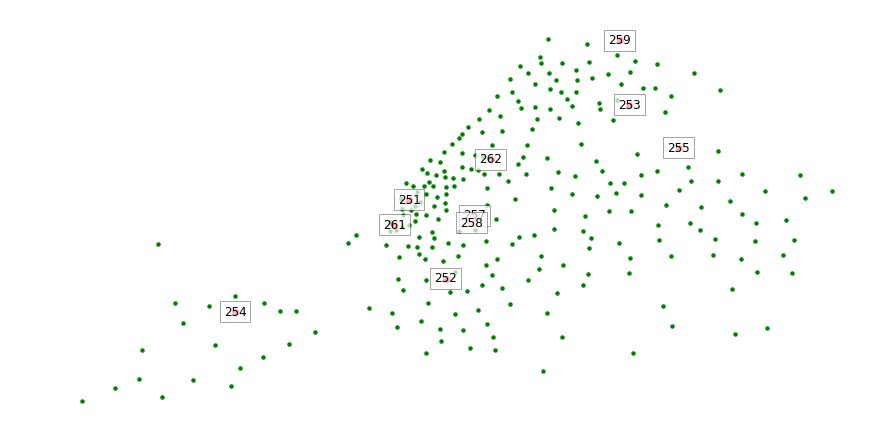

In [ ]:

plt.figure(figsize = (12,6))
nx.draw(Taxi,pos=TripPos,with_labels=False, width=0, node_size=15, node_color='green')
nx.draw(Taxi.subgraph(b2),pos=TripPos,with_labels=False, width=0, node_size=45, node_color='red')
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
_ = nx.draw_networkx_labels(Taxi.subgraph(b2),pos=TripPos,bbox=label_options)


In [ ]:
#heatmap plot

In [ ]:
from google.colab import files
location_dfr2.to_csv('location_dfr2.csv')
files.download('location_dfr2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DEGREE CENTRALITY

In [ ]:
degCent = nx.degree_centrality(Taxi)
d1 = sorted(degCent, key=degCent.get, reverse=True)[:5]
d1

[132, 48, 107, 68, 79]

In [ ]:
#top 5 degree center area
location_df3 = location.copy()
location_df3["Degree_centrality"] = location_df3["location_id"].map(degCent)
location_dfr3 = location_df3.sort_values(by=['Degree_centrality'], ascending=False)
location_dfr3.head()

,longtitude,latitude,shape_area,objectid,shape_leng,location_id,zone,borough,Degree_centrality
136,-73.778341,40.642683,0.002038,132,0.245479,132,JFK Airport,Queens,0.110687
47,-73.989857,40.762237,0.000094,48,0.043747,48,Clinton East,Manhattan,0.083969
107,-73.983310,40.737348,0.000075,107,0.038041,107,Gramercy,Manhattan,0.076336
73,-73.985214,40.727944,0.000108,79,0.042625,79,East Village,Manhattan,0.057252
68,-73.999940,40.748397,0.000111,68,0.049337,68,East Chelsea,Manhattan,0.057252


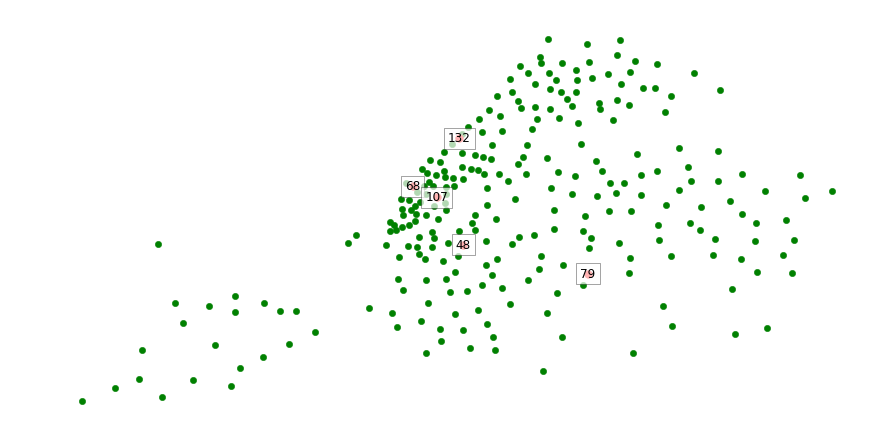

In [ ]:
plt.figure(figsize = (12,6))
nx.draw(Taxi,pos=TripPos,with_labels=False, width=0, node_size=40, node_color='green')
nx.draw(Taxi.subgraph(d1),pos=TripPos,with_labels=False, width=0, node_size=60, node_color='red')
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
_ = nx.draw_networkx_labels(Taxi.subgraph(d1),pos=TripPos,bbox=label_options)


In [ ]:
#heatmap plot

In [ ]:
degCent = nx.degree_centrality(Taxi)
d2 = sorted(degCent, key=degCent.get, reverse=True)[-10:]
d2


[248, 250, 251, 252, 253, 254, 255, 257, 258, 259]

In [ ]:
#last 10 degree center area
location_df4 = location.copy()
location_df4["Degree_centrality"] = location_df4["location_id"].map(degCent)
location_dfr4 = location_df4.sort_values(by=['Degree_centrality'], ascending=True)
location_dfr4.head(10)

,longtitude,latitude,shape_area,objectid,shape_leng,location_id,zone,borough,Degree_centrality
86,-74.173958,40.532016,0.002074,84,0.233624,84,Eltingville/Annadale/Prince's Bay,Staten Island,0.0
109,-74.152727,40.548829,0.001170,109,0.178268,109,Great Kills,Staten Island,0.0
110,-74.125849,40.543265,0.000526,110,0.103946,110,Great Kills Park,Staten Island,0.0
111,-73.990988,40.652115,0.000209,111,0.059931,111,Green-Wood Cemetery,Brooklyn,0.0
207,-74.123164,40.635978,0.000944,206,0.212757,206,Saint George/New Brighton,Staten Island,0.0
205,-73.950410,40.761168,0.000106,202,0.069922,202,Roosevelt Island,Manhattan,0.0
115,-74.092474,40.620141,0.000373,115,0.116169,115,Grymes Hill/Clifton,Staten Island,0.0
204,-73.847281,40.577450,0.000619,201,0.130404,201,Rockaway Park,Queens,0.0
108,-73.980375,40.589109,0.000353,108,0.111171,108,Gravesend,Brooklyn,0.0
117,-73.776092,40.596094,0.000904,117,0.169886,117,Hammels/Arverne,Queens,0.0


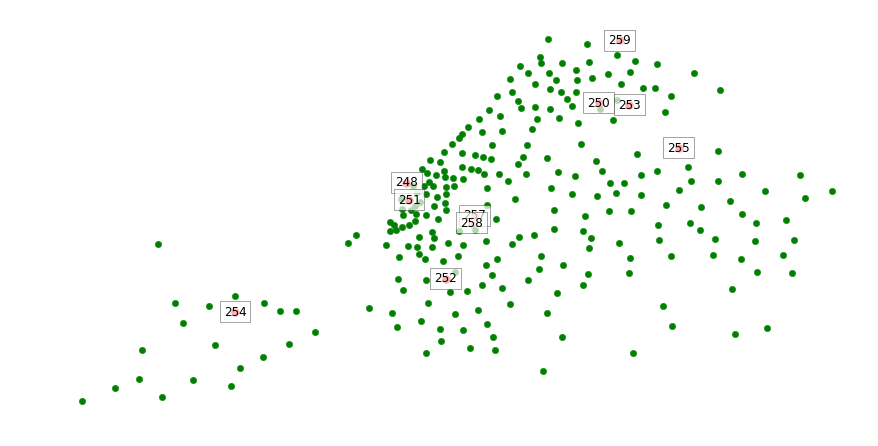

In [ ]:
plt.figure(figsize = (12,6))
nx.draw(Taxi,pos=TripPos,with_labels=False, width=0, node_size=40, node_color='green')
nx.draw(Taxi.subgraph(d2),pos=TripPos,with_labels=False, width=0, node_size=60, node_color='red')
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
_ = nx.draw_networkx_labels(Taxi.subgraph(d2),pos=TripPos,bbox=label_options)



In [ ]:
#heatmap plot
from google.colab import files
location_dfr3.to_csv('location_dfr3.csv')
files.download('location_dfr3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>